In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
#Link to function found in datacamp course
#https://campus.datacamp.com/courses/statistical-thinking-in-python-part-1/graphical-exploratory-data-analysis?ex=12
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


In [2]:
songs_df = pd.read_csv('Data/songs_w_genres_df.csv')
songs_df

,name,artists,year,explicit,popularity,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,mode,key,speechiness,tempo,valence,count,genres
0,Keep A Song In Your Soul,Mamie Smith,1920,0,12,168333,0.991000,0.598,0.224,0.000522,0.3790,-12.628,0,5,0.0936,149.976,0.6340,16.0,"['harlem renaissance', 'traditional blues']"
1,I Put A Spell On You,Screamin' Jay Hawkins,1920,0,7,150200,0.643000,0.852,0.517,0.026400,0.0809,-7.261,0,5,0.0534,86.889,0.9500,32.0,"['blues', 'traditional blues']"
2,Golfing Papa,Mamie Smith,1920,0,4,163827,0.993000,0.647,0.186,0.000018,0.5190,-12.098,1,0,0.1740,97.600,0.6890,16.0,"['harlem renaissance', 'traditional blues']"
3,True House Music - Xavier Santos & Carlos Gomi...,Oscar Velazquez,1920,0,17,422087,0.000173,0.730,0.798,0.801000,0.1280,-7.311,1,2,0.0425,127.997,0.0422,6.0,['circuit']
4,Xuniverxe,Mixe,1920,1,2,165224,0.295000,0.704,0.707,0.000246,0.4020,-6.036,0,10,0.0768,122.076,0.2990,2.0,['glitchcore']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,The One,"DJ Combo', 'Sander-7', 'Tony T",2020,0,0,147615,0.009170,0.792,0.866,0.000060,0.1780,-5.089,0,6,0.0356,125.972,0.1860,NaN,NaN
174385,A Little More,Alessia Cara,2021,0,0,144720,0.795000,0.429,0.211,0.000000,0.1960,-11.665,1,4,0.0360,94.710,0.2280,33.0,"['canadian contemporary r&b', 'canadian pop', ..."
174386,Together,Roger Fly,2020,0,0,218147,0.806000,0.671,0.589,0.920000,0.1130,-12.393,0,4,0.0282,108.058,0.7140,64.0,[]
174387,champagne problems,Taylor Swift,2021,1,69,244000,0.920000,0.462,0.240,0.000000,0.1130,-12.077,1,0,0.0377,171.319,0.3200,443.0,"['dance pop', 'pop']"


In [46]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              174389 non-null  object 
 1   artists           174389 non-null  object 
 2   year              174389 non-null  int64  
 3   explicit          174389 non-null  int64  
 4   popularity        174389 non-null  int64  
 5   duration_ms       174389 non-null  int64  
 6   acousticness      174389 non-null  float64
 7   danceability      174389 non-null  float64
 8   energy            174389 non-null  float64
 9   instrumentalness  174389 non-null  float64
 10  liveness          174389 non-null  float64
 11  loudness          174389 non-null  float64
 12  mode              174389 non-null  int64  
 13  key               174389 non-null  int64  
 14  speechiness       174389 non-null  float64
 15  tempo             174389 non-null  float64
 16  valence           17

In [3]:
songs_df.sort_values(by='popularity', ascending=False)

,name,artists,year,explicit,popularity,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,mode,key,speechiness,tempo,valence,count,genres
20062,drivers license,Olivia Rodrigo,2021,1,100,242014,0.721,0.585,0.436,0.000013,0.1050,-8.761,1,10,0.0601,143.874,0.132,8.0,"['pop', 'post-teen pop']"
19862,Mood (feat. iann dior),"24kGoldn', 'iann dior",2020,1,96,140526,0.221,0.700,0.722,0.000000,0.2720,-3.558,0,7,0.0369,90.989,0.756,NaN,NaN
19866,positions,Ariana Grande,2020,1,96,172325,0.468,0.737,0.802,0.000000,0.0931,-4.771,1,0,0.0878,144.015,0.682,164.0,"['dance pop', 'pop', 'post-teen pop']"
19886,DÁKITI,"Bad Bunny', 'Jhay Cortez",2020,1,95,205090,0.401,0.731,0.573,0.000052,0.1130,-10.059,0,4,0.0544,109.928,0.145,NaN,NaN
19976,BICHOTA,KAROL G,2020,1,95,178947,0.212,0.863,0.666,0.000493,0.1030,-4.158,0,1,0.1520,163.908,0.838,127.0,"['latin', 'reggaeton', 'reggaeton colombiano',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63064,Phul Nebe Go,Tarun Banerjee,1952,0,0,199227,0.982,0.530,0.204,0.004510,0.1430,-15.468,0,11,0.1080,79.712,0.320,50.0,[]
63063,Habanera,Georges Derveaux,1952,0,0,162623,0.994,0.209,0.245,0.916000,0.1280,-15.440,1,2,0.0415,139.475,0.148,2.0,[]
63062,Часть 44.3 - Старик и море,Эрнест Хемингуэй,1952,1,0,95700,0.154,0.800,0.328,0.000000,0.2670,-17.704,1,6,0.9250,42.490,0.344,2350.0,[]
63061,"Symphonie fantastique, Op. 14, H 48: 2. Un bal...","Hector Berlioz', 'Concertgebouworkest', 'Eduar...",1952,0,0,370787,0.958,0.276,0.172,0.633000,0.0651,-16.904,1,9,0.0441,89.437,0.164,NaN,NaN


In [4]:
songs_df.describe()

,year,explicit,popularity,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,mode,key,speechiness,tempo,valence,count
count,174389.000000,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,137418.000000
mean,1977.061764,0.068135,25.693381,2.328100e+05,0.499228,0.536758,0.482721,0.197252,0.211123,-11.750865,0.702384,5.205305,0.105729,117.006500,0.524533,234.949068
std,26.907950,0.251978,21.872740,1.483958e+05,0.379936,0.176025,0.272685,0.334574,0.180493,5.691591,0.457211,3.518292,0.182260,30.254178,0.264477,487.248730
min,1920.000000,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,1955.000000,0.000000,1.000000,1.661330e+05,0.087700,0.414000,0.249000,0.000000,0.099200,-14.908000,0.000000,2.000000,0.035200,93.931000,0.311000,19.000000
50%,1977.000000,0.000000,25.000000,2.057870e+05,0.517000,0.548000,0.465000,0.000524,0.138000,-10.836000,1.000000,5.000000,0.045500,115.816000,0.536000,68.000000
75%,1999.000000,0.000000,42.000000,2.657200e+05,0.895000,0.669000,0.711000,0.252000,0.270000,-7.499000,1.000000,8.000000,0.076300,135.011000,0.743000,208.000000
max,2021.000000,1.000000,100.000000,5.338302e+06,0.996000,0.988000,1.000000,1.000000,1.000000,3.855000,1.000000,11.000000,0.971000,243.507000,1.000000,3179.000000


In [5]:
songs_df['mode'].value_counts()

1    122488
0     51901
Name: mode, dtype: int64

In [48]:
numerical_songs = songs_df.select_dtypes(include=['int64', 'float64'])
numerical_songs.head()

,year,explicit,popularity,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,mode,key,speechiness,tempo,valence,count
0,1920,0,12,168333,0.991000,0.598,0.224,0.000522,0.3790,-12.628,0,5,0.0936,149.976,0.6340,16.0
1,1920,0,7,150200,0.643000,0.852,0.517,0.026400,0.0809,-7.261,0,5,0.0534,86.889,0.9500,32.0
2,1920,0,4,163827,0.993000,0.647,0.186,0.000018,0.5190,-12.098,1,0,0.1740,97.600,0.6890,16.0
3,1920,0,17,422087,0.000173,0.730,0.798,0.801000,0.1280,-7.311,1,2,0.0425,127.997,0.0422,6.0
4,1920,1,2,165224,0.295000,0.704,0.707,0.000246,0.4020,-6.036,0,10,0.0768,122.076,0.2990,2.0


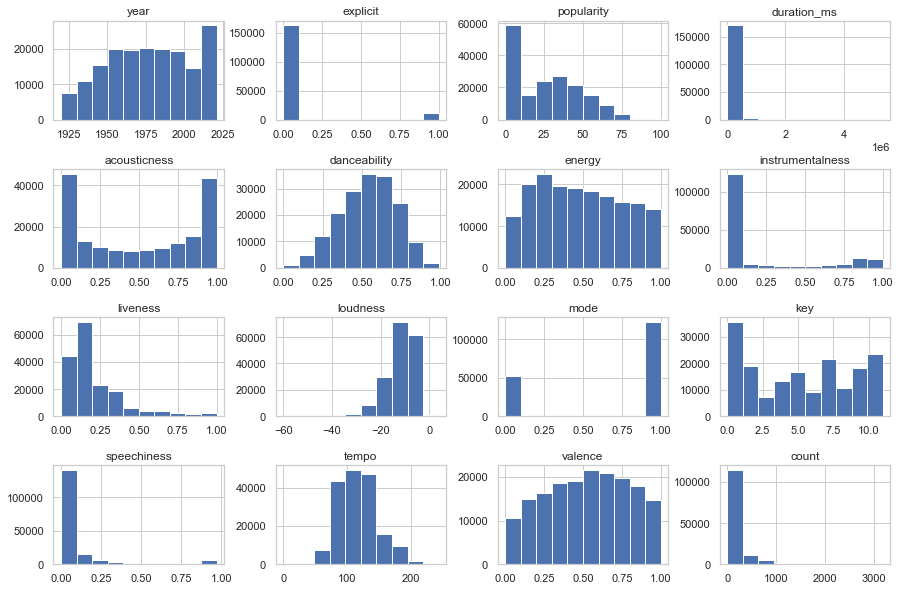

In [50]:
_ = numerical_songs.hist(figsize=(15,10))
_ = plt.subplots_adjust(hspace=0.5)
plt.show()

# Acousticness

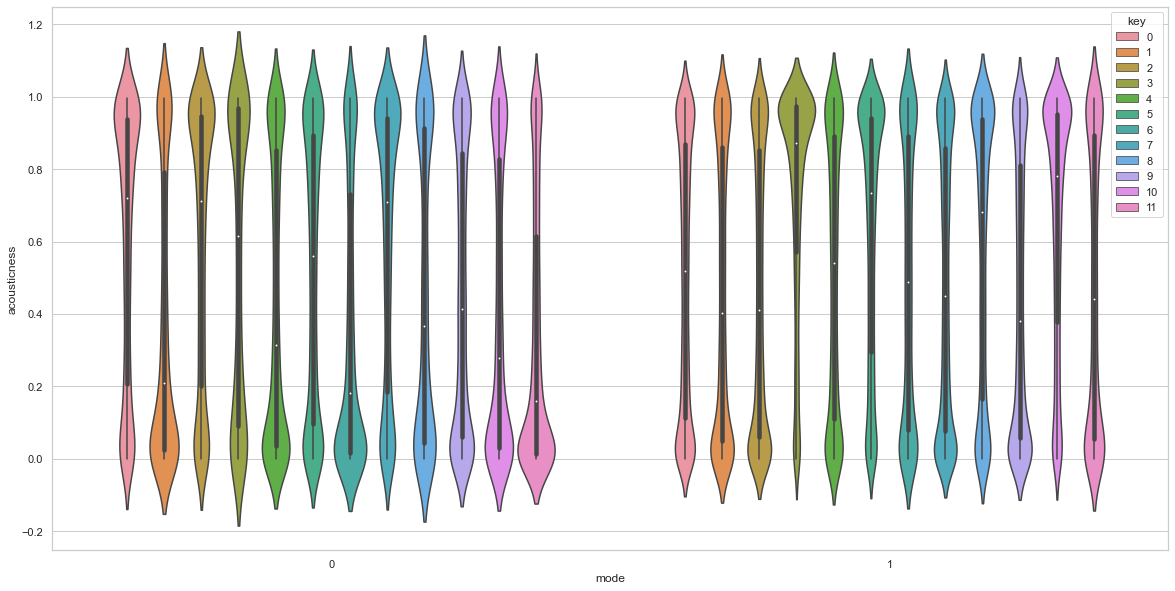

In [22]:
plt.figure(figsize=(20,10))

sns.set_theme(style='whitegrid')
ax = sns.violinplot(x='mode', y='acousticness', hue='key', data=songs_df)

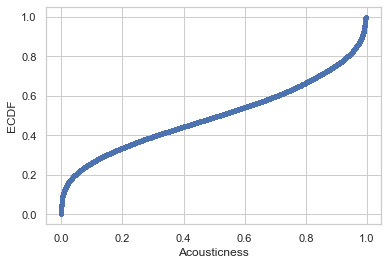

In [44]:
x_yard, y_yard = ecdf(songs_df['acousticness'])

_ = plt.plot(x_yard, y_yard, marker='.', linestyle='none')

_ = plt.xlabel('Acousticness')
_ = plt.ylabel('ECDF')

# Danceability

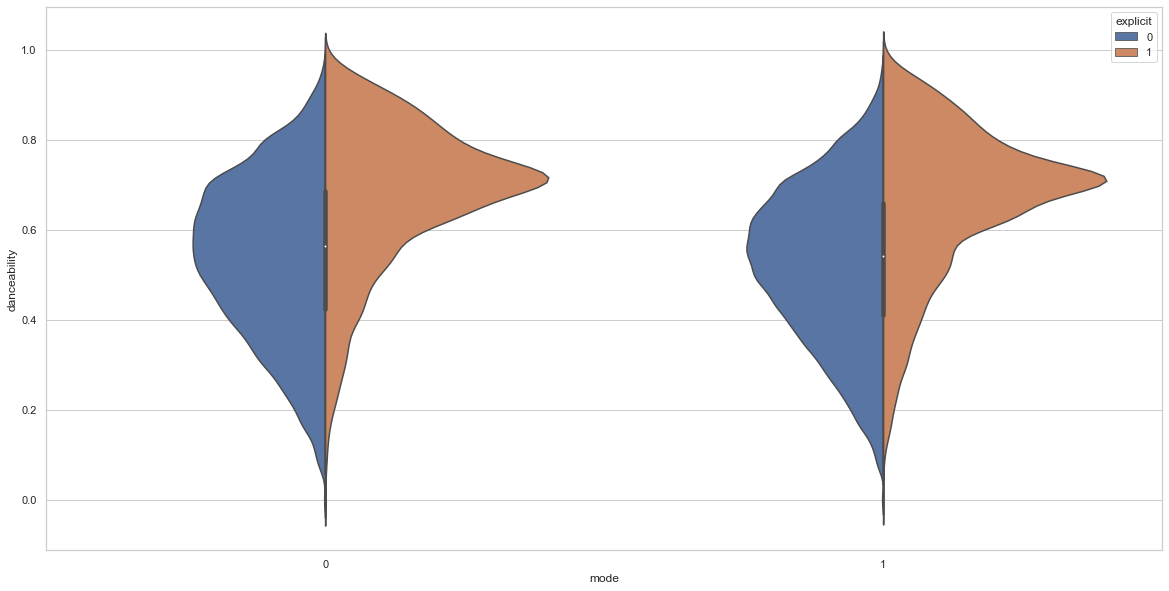

In [23]:
plt.figure(figsize=(20,10))

sns.set_theme(style='whitegrid')
ax = sns.violinplot(x='mode', y='danceability', hue='explicit', data=songs_df, split=True)

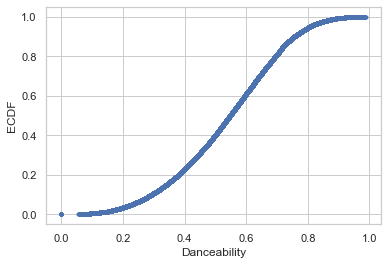

In [34]:
x_yard, y_yard = ecdf(songs_df['danceability'])

_ = plt.plot(x_yard, y_yard, marker='.', linestyle='none')

_ = plt.xlabel('Danceability')
_ = plt.ylabel('ECDF')

# Energy

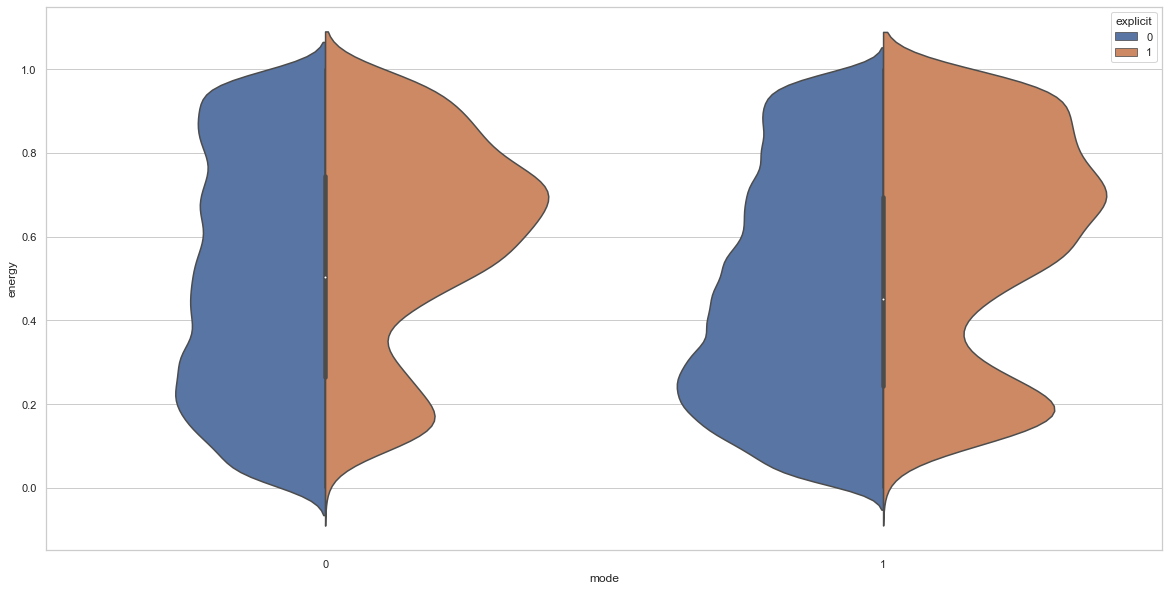

In [24]:
plt.figure(figsize=(20,10))

sns.set_theme(style='whitegrid')
ax = sns.violinplot(x='mode', y='energy', hue='explicit', data=songs_df, split=True)

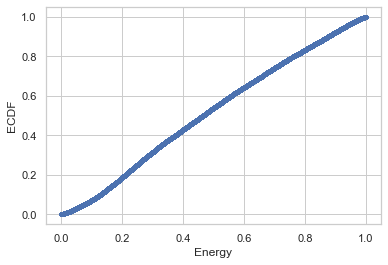

In [36]:
x_yard, y_yard = ecdf(songs_df['energy'])

_ = plt.plot(x_yard, y_yard, marker='.', linestyle='none')

_ = plt.xlabel('Energy')
_ = plt.ylabel('ECDF')

# Instrumentalness

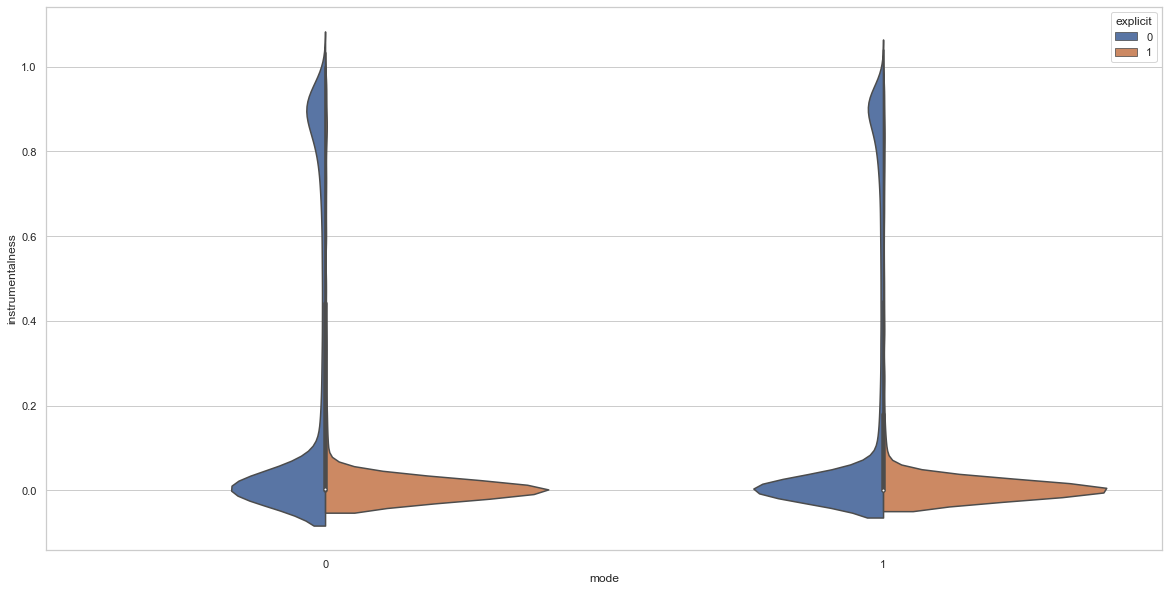

In [25]:
plt.figure(figsize=(20,10))

sns.set_theme(style='whitegrid')
ax = sns.violinplot(x='mode', y='instrumentalness', hue='explicit', data=songs_df, split=True)

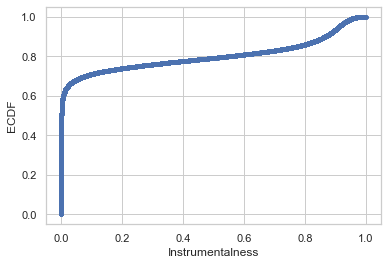

In [37]:
x_yard, y_yard = ecdf(songs_df['instrumentalness'])

_ = plt.plot(x_yard, y_yard, marker='.', linestyle='none')

_ = plt.xlabel('Instrumentalness')
_ = plt.ylabel('ECDF')

# Loudness

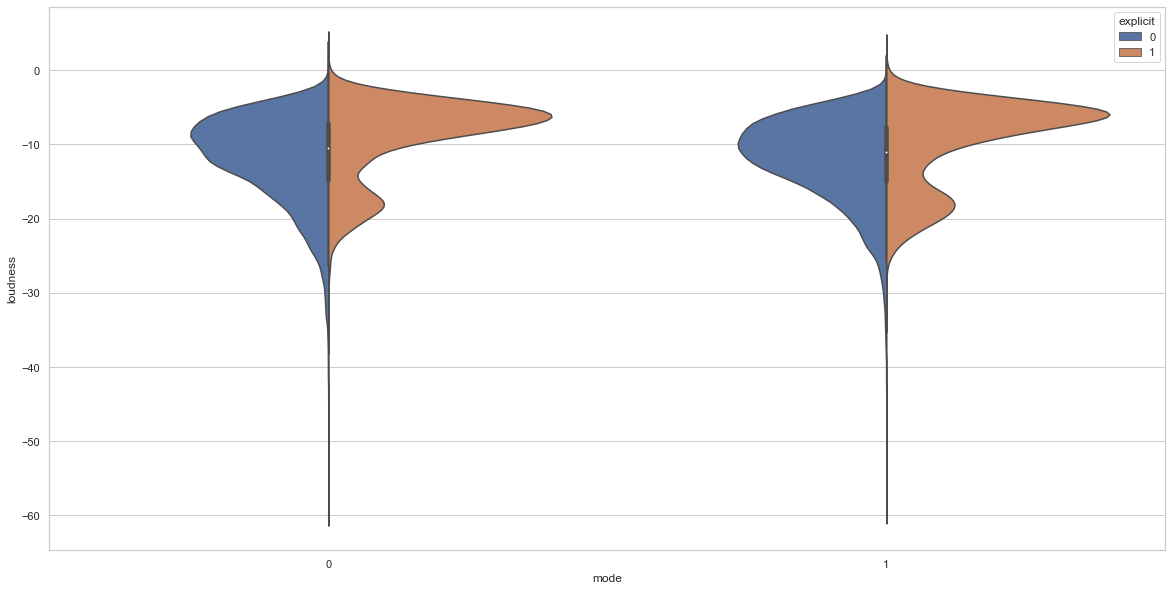

In [26]:
plt.figure(figsize=(20,10))

sns.set_theme(style='whitegrid')
ax = sns.violinplot(x='mode', y='loudness', hue='explicit', data=songs_df, split=True)

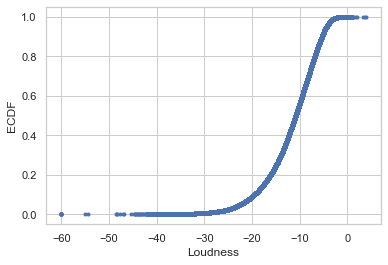

In [38]:
x_yard, y_yard = ecdf(songs_df['loudness'])

_ = plt.plot(x_yard, y_yard, marker='.', linestyle='none')

_ = plt.xlabel('Loudness')
_ = plt.ylabel('ECDF')

# Popularity

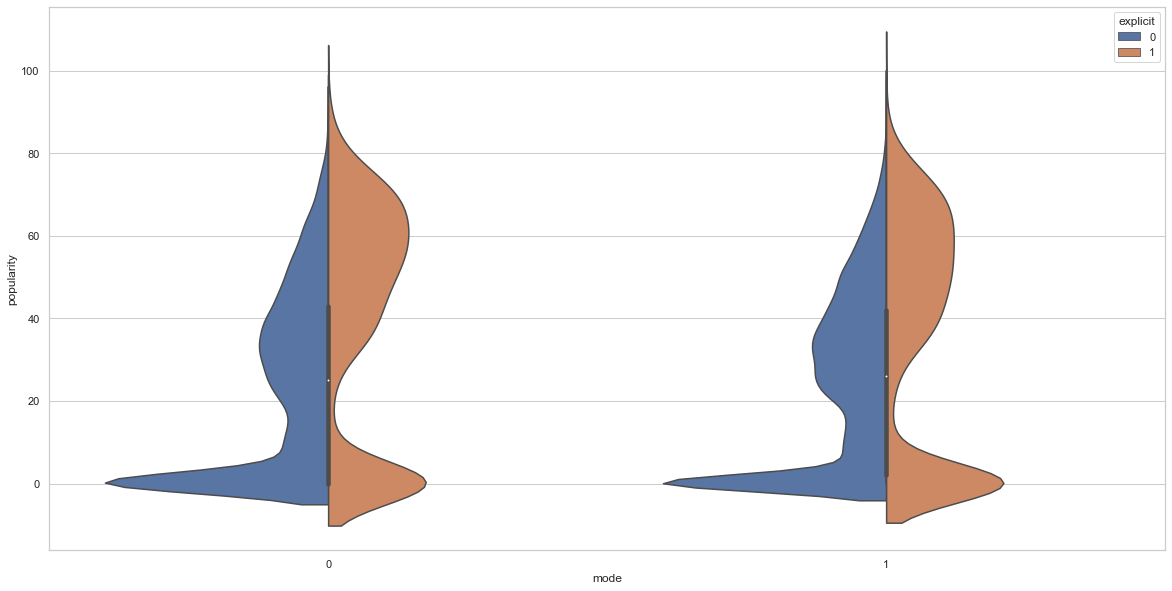

In [27]:
plt.figure(figsize=(20,10))

sns.set_theme(style='whitegrid')
ax = sns.violinplot(x='mode', y='popularity', hue='explicit', data=songs_df, split=True)

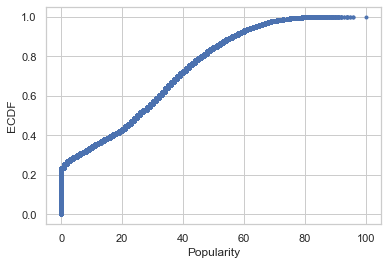

In [39]:
x_yard, y_yard = ecdf(songs_df['popularity'])

_ = plt.plot(x_yard, y_yard, marker='.', linestyle='none')

_ = plt.xlabel('Popularity')
_ = plt.ylabel('ECDF')

# Speechiness

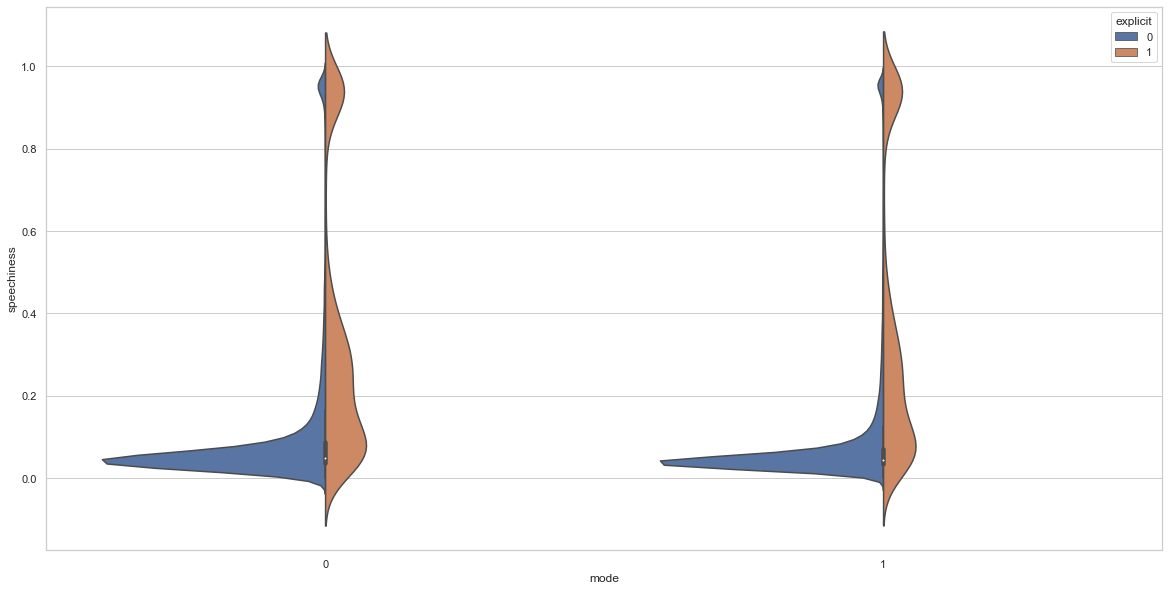

In [28]:
plt.figure(figsize=(20,10))

sns.set_theme(style='whitegrid')
ax = sns.violinplot(x='mode', y='speechiness', hue='explicit', data=songs_df, split=True)

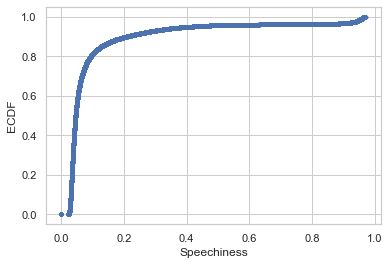

In [40]:
x_yard, y_yard = ecdf(songs_df['speechiness'])

_ = plt.plot(x_yard, y_yard, marker='.', linestyle='none')

_ = plt.xlabel('Speechiness')
_ = plt.ylabel('ECDF')

# Tempo

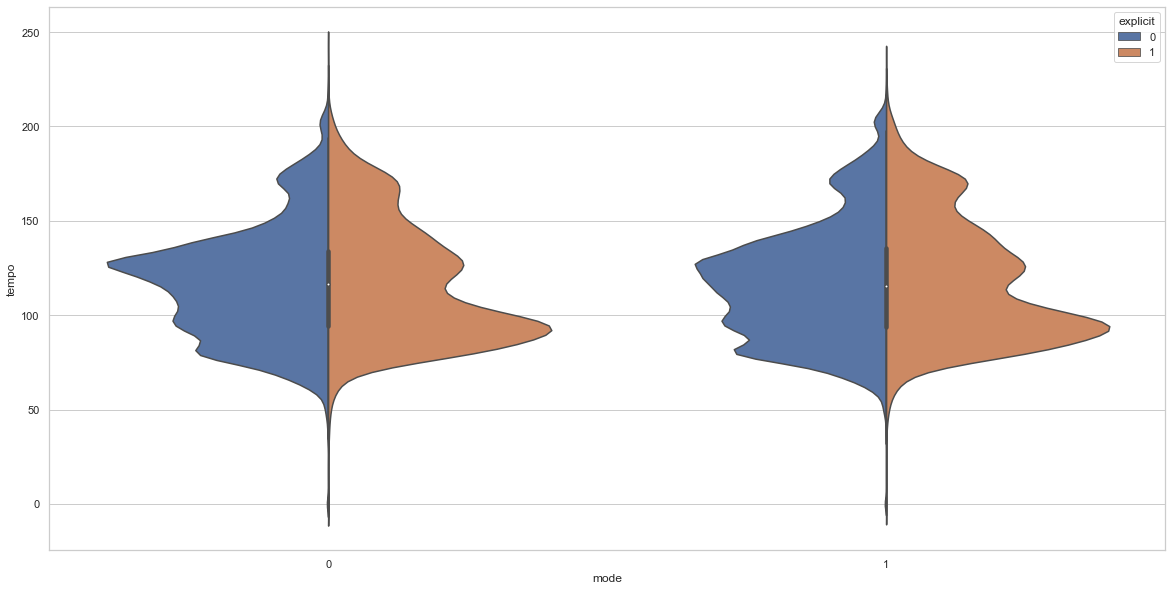

In [29]:
plt.figure(figsize=(20,10))

sns.set_theme(style='whitegrid')
ax = sns.violinplot(x='mode', y='tempo', hue='explicit', data=songs_df, split=True)

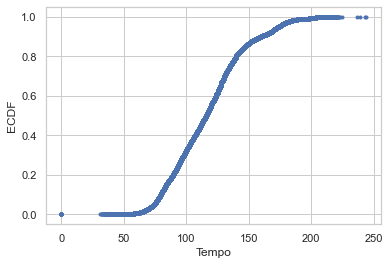

In [41]:
x_yard, y_yard = ecdf(songs_df['tempo'])

_ = plt.plot(x_yard, y_yard, marker='.', linestyle='none')

_ = plt.xlabel('Tempo')
_ = plt.ylabel('ECDF')

# Valence

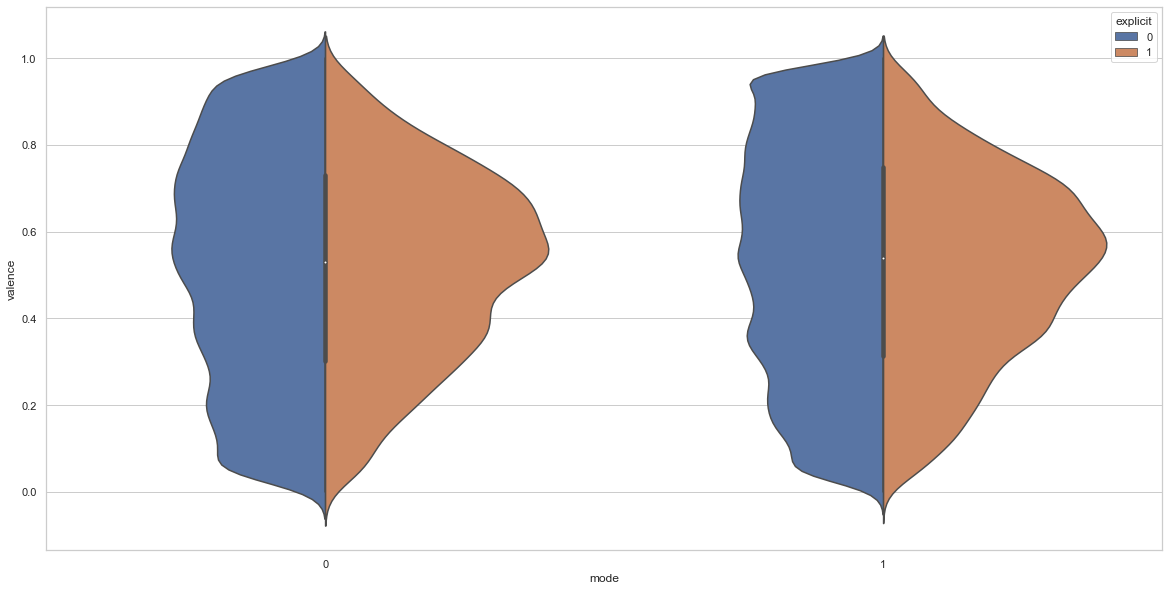

In [42]:
plt.figure(figsize=(20,10))

sns.set_theme(style='whitegrid')
ax = sns.violinplot(x='mode', y='valence', hue='explicit', data=songs_df, split=True)

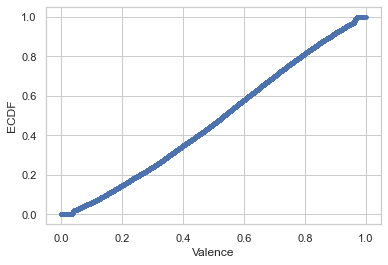

In [43]:
x_yard, y_yard = ecdf(songs_df['valence'])

_ = plt.plot(x_yard, y_yard, marker='.', linestyle='none')

_ = plt.xlabel('Valence')
_ = plt.ylabel('ECDF')